In [2]:
import random
import statistics

import matplotlib.pyplot as plt
import torch.optim as optim

from dataset import *
from models import *

BATCH_SIZE = 32
TEST_STEP = 5

trainset = IMPAXDataset('/shares/Public/IMPAX/train')
testset  = IMPAXDataset('/shares/Public/IMPAX/train')

# print(len(trainset))
# exit()

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=6)

testloader = torch.utils.data.DataLoader(testset, batch_size=TEST_STEP,
                                          shuffle=True, num_workers=6)

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = N90().to(device)

# criterion = nn.MSELoss(reduction='sum')
criterion = nn.MSELoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

# optimizer = optim.Adam(net.parameters(), lr=0.01)
optimizer = optim.Adam(net.parameters())


# for epoch in range(3):   # 训练所有!整套!数据 3 次
#     for step, (batch_x, batch_y) in enumerate(trainloader):  # 每一步 loader 释放一小批数据用来学习
#         # 假设这里就是你训练的地方...

#         # 打出来一些数据
#         print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
#               batch_x.numpy(), '| batch y: ', batch_y.numpy())
# exit()


train_loss = []

for epoch in range(99):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # print(inputs[0])
        # print(labels[0])
        # exit()
        # print(inputs)
        # break
        # # continue

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        

    print('[%d, %5d] trian loss: %.3f' % (epoch + 1, i, running_loss/i))
    
    train_loss.append(running_loss/i)
    
#     print(train_loss)
#     print(train_loss[-5:])
    
    if epoch > 20:
        if statistics.mean(train_loss[-10:-1]) > statistics.mean(train_loss[-20: -10]):
            break

print('Finished Training')


test_loss = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        test_loss.append(criterion(labels, outputs.cpu()))

mean = torch.mean(torch.stack(test_loss))
print('test loss: %.3f' % (mean.item()))



Using device: cuda

GeForce RTX 2080 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    2.6 GB
[1,    35] trian loss: 1433.191
[2,    35] trian loss: 355.490
[3,    35] trian loss: 196.416
[4,    35] trian loss: 147.377
[5,    35] trian loss: 135.332
[6,    35] trian loss: 121.579
[7,    35] trian loss: 107.172
[8,    35] trian loss: 95.045
[9,    35] trian loss: 97.039
[10,    35] trian loss: 83.606
[11,    35] trian loss: 85.872
[12,    35] trian loss: 71.687
[13,    35] trian loss: 85.657
[14,    35] trian loss: 80.232
[15,    35] trian loss: 82.041
[16,    35] trian loss: 71.219
[17,    35] trian loss: 60.671
[18,    35] trian loss: 63.611
[19,    35] trian loss: 59.995
[20,    35] trian loss: 58.747
[21,    35] trian loss: 51.676
[22,    35] trian loss: 52.033
[23,    35] trian loss: 64.550
[24,    35] trian loss: 50.678
[25,    35] trian loss: 61.712
[26,    35] trian loss: 67.763
[27,    35] trian loss: 55.693
[28,    35] trian loss: 52.792
[29,    35] trian loss: 49.608
[30,    35] 

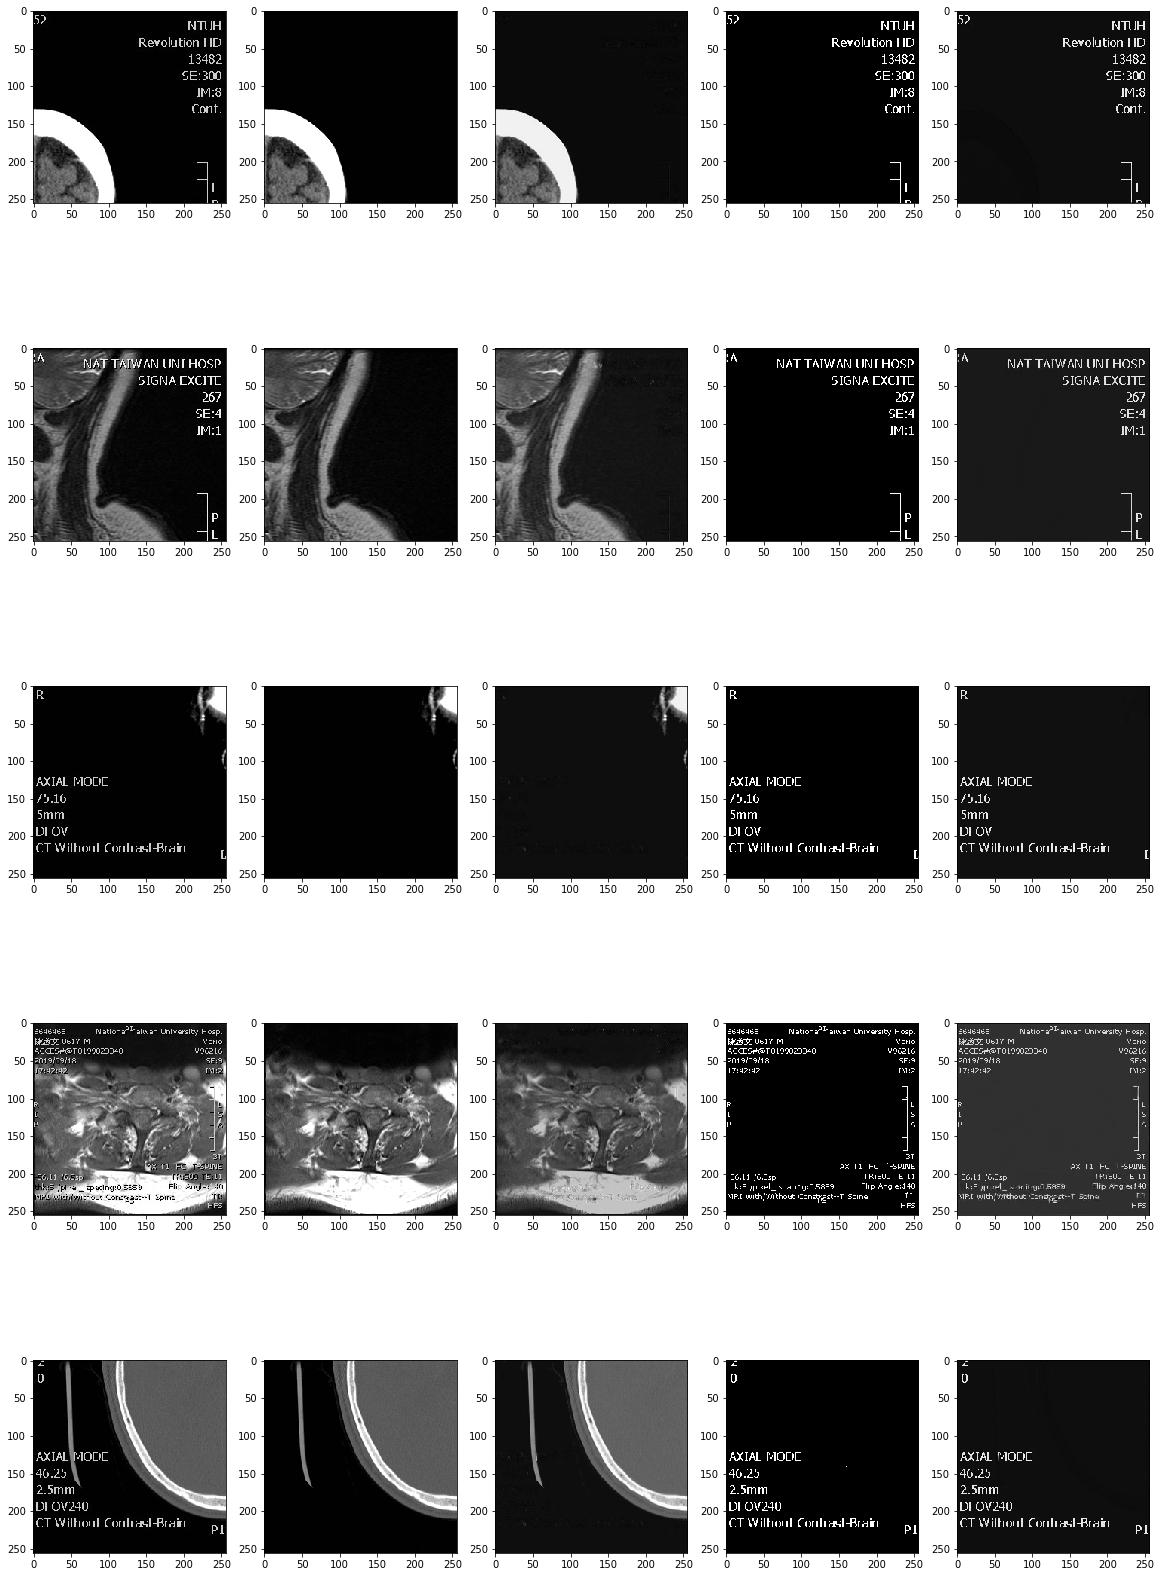

In [13]:
plt.rcParams['figure.figsize'] = [20, 30]

dataiter = iter(testloader)
# dataiter = iter(trainloader)
images, labels = dataiter.next()
output = net(images.to(device))

# torch.set_printoptions(profile="full")
# print(labels[0])
# torch.set_printoptions(profile="default")

for j in range(TEST_STEP):
    out = output[j]
    plt.subplot(TEST_STEP,5,j*5+1)
    plt.imshow(images[j][0,:,:], cmap='gray')
    
    plt.subplot(TEST_STEP,5,j*5+2)
    plt.imshow(labels[j][0,:,:], cmap='gray')
    plt.subplot(TEST_STEP,5,j*5+3)
    plt.imshow(out[0,:,:].cpu().detach().numpy(), cmap='gray')
    
    plt.subplot(TEST_STEP,5,j*5+4)
    plt.imshow(labels[j][1,:,:], cmap='gray')
    plt.subplot(TEST_STEP,5,j*5+5)
    plt.imshow(out[1,:,:].cpu().detach().numpy(), cmap='gray')
    
plt.show()
